# 04 -- Exercise (Evaluating & Tuning Machine Learning Classifiers)

**Task:** Tune a multilayer perceptron classifier using randomized search such that the 5-fold k-fold CV performance reaches >93%.

**Hints:**

- Note: use the `RandomizedCV?` call to get details on the usage and attributes you might find helpful (`.best_params_`, `.best_score_`).

- Note: use the `MLPClassifier?` call to get details on the hyperparamter names.

- Choose a reasonable number of search iterations so that the code finishes in reasonable time (perhaps start small).

- Recommended hyperparameters to consider: 
   - hidden layer size
   - initial learning rate
   - activation function
   


**Final evaluation:**

- What are the final best hyperparameter settings? (Hint: Access the `.best_params_` attribute after fitting).
- Once you reached a satisfactory k-fold CV performance, evaluate the model on the test set.
- Optionally also plot a confusion matrix.

## Given dataset (no need to modify :))

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/Dry_Bean_Dataset.csv")

# drop rows with missing values:
df = df.dropna(axis=0)

df_X = df.drop(columns=["Class"])
df_y = df["Class"]

X_train, X_temp, y_train, y_temp = train_test_split(
    df_X, df_y, test_size=0.4, random_state=123, stratify=df_y)

X_val, X_test, y_val, y_test = train_test_split(
    df_X, df_y, test_size=0.75, random_state=123, stratify=df_y)

## Given pipeline (no need to modify :))

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


sc = StandardScaler()
model = MLPClassifier(max_iter=5000)
pipe = make_pipeline(sc, model)

In [12]:
print(pipe)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(max_iter=500))])


In [16]:
# MLPClassifier?

In [17]:
from scipy.stats import loguniform

param_distributions = {
     "mlpclassifier__hidden_layer_sizes": [5, 10, 25, 50, [5, 10], [10, 10]],
     "mlpclassifier__learning_rate_init": loguniform(0.001, 0.1), 
     "mlpclassifier__activation": ['logistic', 'tanh', 'relu']
}

rcv = RandomizedSearchCV(
    pipe,
    param_distributions,
    n_iter=5,
    cv=5,
    random_state=123,
    verbose=1
)

In [18]:
mlp = MLPClassifier(activation="logistic")

In [19]:
rcv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('mlpclassifier',
                                              MLPClassifier(max_iter=500))]),
                   n_iter=5,
                   param_distributions={'mlpclassifier__activation': ['logistic',
                                                                      'tanh',
                                                                      'relu'],
                                        'mlpclassifier__hidden_layer_sizes': [5,
                                                                              10,
                                                                              25,
                                                                              50,
                                                                              [5,
                                                                               10],
                                                                              [10,
                                                                               10]],
                                        'mlpclassifier__learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x136685520>},
                   random_state=123, verbose=1)

In [20]:
rcv.best_params_

{'mlpclassifier__activation': 'logistic',
 'mlpclassifier__hidden_layer_sizes': 25,
 'mlpclassifier__learning_rate_init': 0.012665709946616687}

In [21]:
rcv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=25,
                               learning_rate_init=0.012665709946616687,
                               max_iter=500))])

In [23]:
rcv.predict(X_test)

array(['HOROZ', 'SIRA', 'DERMASON', ..., 'HOROZ', 'BARBUNYA', 'SEKER'],
      dtype='<U8')

In [9]:
rcv.best_score_

0.9345346293023647

In [10]:
rcv.score(X_test, y_test)

0.9348828086692165

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rcv.predict(X_test)

cmat = confusion_matrix(y_test, y_pred)

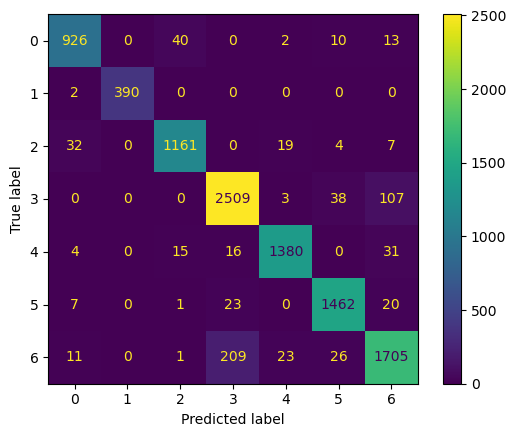

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot();